In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For Eliminate All Error:
import warnings
warnings.simplefilter('ignore')

In [2]:
jokes = pd.read_csv('jokes.csv')
jokes.shape

(139, 2)

In [3]:
jokes.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [4]:
train = pd.read_csv('train.csv')
train.shape

(1092059, 4)

In [5]:
train.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [6]:
### Now I merge two dataframe based on joke_id as it is the primary key both of this

In [7]:
df = pd.merge(train, jokes, left_on='joke_id', right_on='joke_id', how='left')
df.shape

(1092059, 5)

In [8]:
df.head()

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,16144_109,16144,109,5.094,One day the first grade teacher was reading th...
2,23098_6,23098,6,-6.438,Q. What is orange and sounds like a parrot? A....
3,14273_86,14273,86,4.406,Two attorneys went into a diner and ordered tw...
4,18419_134,18419,134,9.375,A man is driving in the country one evening wh...


In [9]:
df = df.drop(['id','user_id','joke_id'],axis=1)

In [10]:
df.shape

(1092059, 2)

In [11]:
df.head()

,Rating,joke_text
0,2.750,"Judy was having trouble with her computer, so ..."
1,5.094,One day the first grade teacher was reading th...
2,-6.438,Q. What is orange and sounds like a parrot? A....
3,4.406,Two attorneys went into a diner and ordered tw...
4,9.375,A man is driving in the country one evening wh...


In [12]:
test = pd.read_csv('test.csv')
test.shape

(537880, 3)

In [13]:
test.head()

,id,user_id,joke_id
0,6194_11,6194,11
1,19356_3,19356,3
2,23426_79,23426,79
3,40030_3,40030,3
4,19806_115,19806,115


In [14]:
df_test = pd.merge(test, jokes, left_on='joke_id', right_on='joke_id', how='left')
df_test.shape

(537880, 4)

In [15]:
df_test.head()

,id,user_id,joke_id,joke_text
0,6194_11,6194,11,What's the difference between a used tire and ...
1,19356_3,19356,3,Q. Did you hear about the dyslexic devil worsh...
2,23426_79,23426,79,A radio conversation between a US naval ship a...
3,40030_3,40030,3,Q. Did you hear about the dyslexic devil worsh...
4,19806_115,19806,115,An American tourist goes into a restaurant in ...


In [16]:
df_test = df_test.drop(['id','user_id','joke_id'],axis=1)

In [17]:
sub = pd.read_csv('sample_submission_5ms57N3.csv')
sub.shape

(537880, 2)

In [18]:
sub.head()

,id,Rating
0,6194_11,0
1,19356_3,0
2,23426_79,0
3,40030_3,0
4,19806_115,0


In [19]:
df.shape,df_test.shape,sub.shape

((1092059, 2), (537880, 1), (537880, 2))

# Data Preprocess

In [21]:
df.isnull().sum()

Rating       0
joke_text    0
dtype: int64

In [22]:
df_test.isnull().sum()

joke_text    0
dtype: int64

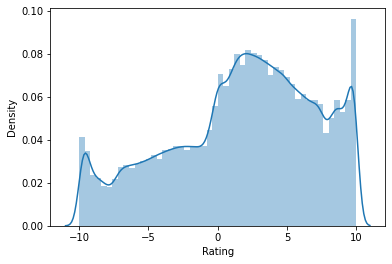

In [23]:
sns.distplot(df.Rating)
plt.show()

In [24]:
from scipy.stats import skew
print(skew(df.Rating))

-0.4388476442321379


## text Preprocess

In [25]:
df.head()

,Rating,joke_text
0,2.750,"Judy was having trouble with her computer, so ..."
1,5.094,One day the first grade teacher was reading th...
2,-6.438,Q. What is orange and sounds like a parrot? A....
3,4.406,Two attorneys went into a diner and ordered tw...
4,9.375,A man is driving in the country one evening wh...


In [26]:
# a = df.loc[4]['joke_text']
# a

In [27]:
# import re
# from nltk.stem import PorterStemmer
# from nltk.corpus import stopwords
# ps = PorterStemmer()
# a = re.sub('[^a-zA-Z]',' ',a)
# a = a.lower()
# a = a.split()
# a = [ps.stem(word) for word in a if word not in set(stopwords.words('english'))]
# a = ' '.join(a)  
# a

In [28]:
df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [29]:
df_test.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [30]:
df.joke_text = df.joke_text.str.lower()

In [31]:
df_test.joke_text = df.joke_text.str.lower()

In [32]:
df.head()

,Rating,joke_text
0,2.750,judy was having trouble with her computer so ...
1,5.094,one day the first grade teacher was reading th...
2,-6.438,q what is orange and sounds like a parrot a ...
3,4.406,two attorneys went into a diner and ordered tw...
4,9.375,a man is driving in the country one evening wh...


In [33]:
df_test.head()

,joke_text
0,judy was having trouble with her computer so ...
1,one day the first grade teacher was reading th...
2,q what is orange and sounds like a parrot a ...
3,two attorneys went into a diner and ordered tw...
4,a man is driving in the country one evening wh...


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['joke_text'],df['Rating'],test_size=0.25,random_state=42)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [36]:
X_train_vect.shape

(819044, 2062)

In [37]:
test_vect = vectorizer.transform(df_test['joke_text'])

In [38]:
test_vect.shape

(537880, 2062)

## Model Build

In [40]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor().fit(X_train_vect, y_train)

In [41]:
from sklearn.metrics import mean_squared_error
y_pred = lgb.predict(X_test_vect)
rms = mean_squared_error(y_test, y_pred, squared=False)
rms

4.968380595595585

In [42]:
y_pred.round(3)

array([-2.274,  2.78 ,  2.987, ...,  0.546, -0.664,  2.708])

In [43]:
y_test

918721    -0.438
938309    -1.750
1056649   -9.031
880930    -1.562
191068     1.531
           ...  
640135    -2.938
555005    -7.469
786900    -6.719
370966    -0.250
232638     0.469
Name: Rating, Length: 273015, dtype: float64

In [49]:
df_test

,joke_text
0,judy was having trouble with her computer so ...
1,one day the first grade teacher was reading th...
2,q what is orange and sounds like a parrot a ...
3,two attorneys went into a diner and ordered tw...
4,a man is driving in the country one evening wh...
...,...
537875,what a woman says this place is a mess c mo...
537876,sherlock holmes and dr watson go on a camping...
537877,this guy s wife asks honey if i died would ...
537878,a jewish young man was seeing a psychiatrist f...


In [61]:
preds_test = lgb.predict(test_vect)
sub['Rating'] = preds_test.round(3)

sub.to_csv('sub1.csv',index=False)

In [62]:
sub.head()

,id,Rating
0,6194_11,1.640
1,19356_3,2.799
2,23426_79,-1.586
3,40030_3,2.319
4,19806_115,1.812
